# Downloading the data

## Covid data

In [149]:
!wget -c https://arcgis.com/sharing/rest/content/items/b03b454aed9b4154ba50df4ba9e1143b/data -O infections.csv

--2021-12-19 15:41:04--  https://arcgis.com/sharing/rest/content/items/b03b454aed9b4154ba50df4ba9e1143b/data
Resolving arcgis.com (arcgis.com)... 18.234.22.27, 52.23.2.231, 18.234.22.251, ...
Connecting to arcgis.com (arcgis.com)|18.234.22.27|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.arcgis.com/sharing/rest/content/items/b03b454aed9b4154ba50df4ba9e1143b/data [following]
--2021-12-19 15:41:04--  https://www.arcgis.com/sharing/rest/content/items/b03b454aed9b4154ba50df4ba9e1143b/data
Resolving www.arcgis.com (www.arcgis.com)... 18.234.22.25, 52.23.2.231, 18.234.22.28, ...
Connecting to www.arcgis.com (www.arcgis.com)|18.234.22.25|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



Niestety, dane dla województw ze: [stron rządowych](https://www.gov.pl/web/koronawirus/wykaz-zarazen-koronawirusem-sars-cov-2) po roku 2020 są nie spójne (zmienne nazwy i kolejność kolumn, data modyfikacji przez używanie różnych plików z różnymi wersjami tabeli itp.) co utrudnia analizę.

*Próba wyciągnięcia danych ze stron rządowych zawarłem poniżej*

Do analizy skorzystam jednak z danych zbieranych przez **Johns Hopkins University**: [Projekt z danymi](https://github.com/owid/covid-19-data/blob/master/public/data/jhu/new_cases.csv).

In [150]:
!wget -c https://covid.ourworldindata.org/data/jhu/new_cases.csv -O infections_jhu.csv

--2021-12-19 15:41:04--  https://covid.ourworldindata.org/data/jhu/new_cases.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 104.21.233.138, 104.21.233.137, 2606:4700:3038::6815:e98a, ...
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|104.21.233.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘infections_jhu.csv’

infections_jhu.csv      [ <=>                ] 799.56K  --.-KB/s    in 0.05s   

2021-12-19 15:41:04 (17.0 MB/s) - ‘infections_jhu.csv’ saved [818746]



## Weather data

Create a temporary directory and download .zip files into it

In [151]:
import os
import urllib.request

CWD = os.getcwd()
# os.chdir("/content") # main folder for Google Colab is /content
files_path = "weatherFiles" 

# create a temporary folder for weather data as there are multiple zip files
if not os.path.isdir(files_path):
  os.makedirs(files_path)

print(os.listdir(".")) # content of current directroy (should have weatherFiles)

# data source (daily)
url_path = "https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/synop/"

# wroclaw 2020 (wroclaw station, daily data)
wroclaw_file = "2020_424_s.zip"
urllib.request.urlretrieve(url_path + '2020/' + wroclaw_file, files_path + '/' + wroclaw_file)

# polska 2021 (all station's daily data for first 11 months)
files = [f'2021_{x:02d}_s.zip' for x in range(1, 12)]
print(files)

for file in files:
  urllib.request.urlretrieve(url_path + '2021/' + file, files_path + '/' + file)

['.config', 'weatherFiles', 'infections_jhu.csv', 'combined_weather.csv', 'infections.csv', 'sample_data']
['2021_01_s.zip', '2021_02_s.zip', '2021_03_s.zip', '2021_04_s.zip', '2021_05_s.zip', '2021_06_s.zip', '2021_07_s.zip', '2021_08_s.zip', '2021_09_s.zip', '2021_10_s.zip', '2021_11_s.zip']


Extract all zip files in the temporary directory


In [152]:
import zipfile
#os.chdir("/content")

os.chdir(CWD) # repeat for safety

os.chdir(files_path)
print(os.listdir(".")) # list all files before unzipping

for file in os.listdir("."):
    if zipfile.is_zipfile(file): # if it is a zipfile, extract it
        with zipfile.ZipFile(file) as item: # treat the file as a zip
           item.extractall()  # extract it in the working directory

print(os.listdir(".")) # list all files after unzipping

os.chdir(CWD) # go back to main directory for safety

['2021_11_s.zip', '2021_06_s.zip', '2021_08_s.zip', '2021_09_s.zip', '2020_424_s.zip', '2021_01_s.zip', '2021_02_s.zip', '2021_03_s.zip', '2021_04_s.zip', '2021_05_s.zip', '2021_07_s.zip', '2021_10_s.zip']
['s_d_09_2021.csv', '2021_11_s.zip', 's_d_05_2021.csv', '2021_06_s.zip', 's_d_t_08_2021.csv', 's_d_t_04_2021.csv', 's_d_10_2021.csv', '2021_08_s.zip', '2021_09_s.zip', 's_d_t_09_2021.csv', 's_d_04_2021.csv', 's_d_424_2020.csv', '2020_424_s.zip', 's_d_t_11_2021.csv', '2021_01_s.zip', '2021_02_s.zip', '2021_03_s.zip', '2021_04_s.zip', 's_d_08_2021.csv', 's_d_02_2021.csv', 's_d_t_03_2021.csv', '2021_05_s.zip', 's_d_t_424_2020.csv', '2021_07_s.zip', 's_d_t_07_2021.csv', 's_d_06_2021.csv', 's_d_t_06_2021.csv', 's_d_t_05_2021.csv', 's_d_11_2021.csv', 's_d_t_10_2021.csv', 's_d_07_2021.csv', 's_d_t_01_2021.csv', 's_d_01_2021.csv', 's_d_03_2021.csv', '2021_10_s.zip', 's_d_t_02_2021.csv']


Read all .csv files into one big merged dataframe and save it to one .csv file.
Delete the temporary folder

In [153]:
import os
import glob
import pandas as pd
import re
import shutil

os.chdir(CWD)
os.chdir(files_path)

extension = 'csv'
regex = re.compile("s_d_\d*_.*") # expected format of files

all_filenames = [i for i in glob.glob('*.{}'.format(extension)) if re.match(regex, i)]
print(all_filenames)

read_df = [pd.read_csv(f, encoding = 'windows-1250', header=None) for f in all_filenames]

# for df in read_df:
#   print(df.info())

combined_csv = pd.concat(read_df)

combined_csv.to_csv(CWD + "/combined_weather.csv", index=False, encoding='windows-1250', header=None)

os.chdir(CWD)
shutil.rmtree(files_path) # cleanup

['s_d_09_2021.csv', 's_d_05_2021.csv', 's_d_10_2021.csv', 's_d_04_2021.csv', 's_d_424_2020.csv', 's_d_08_2021.csv', 's_d_02_2021.csv', 's_d_06_2021.csv', 's_d_11_2021.csv', 's_d_07_2021.csv', 's_d_01_2021.csv', 's_d_03_2021.csv']


# Data wrangling


## Data about Covid cases from official website

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [155]:
whitespace_conv = lambda x : int(x.replace(' ', ''))
df_infections = pd.read_csv("infections.csv", delimiter=';', encoding="windows-1250", converters={"Nowe przypadki" : whitespace_conv, "Zgony" : whitespace_conv})

In [156]:
df_infections.head()

,Unnamed: 0,Data,Nowe przypadki,Wszystkie przypadki kumulatywnie,Zgony,Wszystkie zgony kumulatywnie,Ozdrowieńcy (dzienna),Ozdrowieńcy (suma),Aktywne przypadki,Kwarantanna,Nadzór
0,wtorek,03.03.2020,0,0,0,0,0,0,0,316,4459
1,środa,04.03.2020,1,1,0,0,0,0,0,349,4540
2,czwartek,05.03.2020,0,1,0,0,0,0,0,490,5647
3,piątek,06.03.2020,4,5,0,0,0,0,0,1299,6184
4,sobota,07.03.2020,1,6,0,0,0,0,0,1548,6409


In [157]:
df_infections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        266 non-null    object
 1   Data                              266 non-null    object
 2   Nowe przypadki                    266 non-null    int64 
 3   Wszystkie przypadki kumulatywnie  266 non-null    int64 
 4   Zgony                             266 non-null    int64 
 5   Wszystkie zgony kumulatywnie      266 non-null    object
 6   Ozdrowieńcy (dzienna)             266 non-null    int64 
 7   Ozdrowieńcy (suma)                266 non-null    object
 8   Aktywne przypadki                 266 non-null    int64 
 9   Kwarantanna                       266 non-null    int64 
 10  Nadzór                            266 non-null    object
dtypes: int64(6), object(5)
memory usage: 23.0+ KB


In [158]:
# extract interesting columns
columns = ['Data', 'Nowe przypadki', 'Zgony']
df_infections = pd.DataFrame(df_infections, columns=columns)

# rename columns (polish -> english)
df_infections.columns = ['Date', 'New cases', 'Deaths']

# date as datetime object
df_infections['Date'] = pd.to_datetime(df_infections['Date'].apply(lambda x : datetime.datetime.strptime(x, "%d.%m.%Y").date()))

df_infections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       266 non-null    datetime64[ns]
 1   New cases  266 non-null    int64         
 2   Deaths     266 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 6.4 KB


In [159]:
df_infections.head()

,Date,New cases,Deaths
0,2020-03-03,0,0
1,2020-03-04,1,0
2,2020-03-05,0,0
3,2020-03-06,4,0
4,2020-03-07,1,0


In [160]:
df_infections.tail()

,Date,New cases,Deaths
261,2020-11-19,23975,637
262,2020-11-20,22464,626
263,2020-11-21,24213,574
264,2020-11-22,17856,330
265,2020-11-23,15002,156


Plot data to check validity

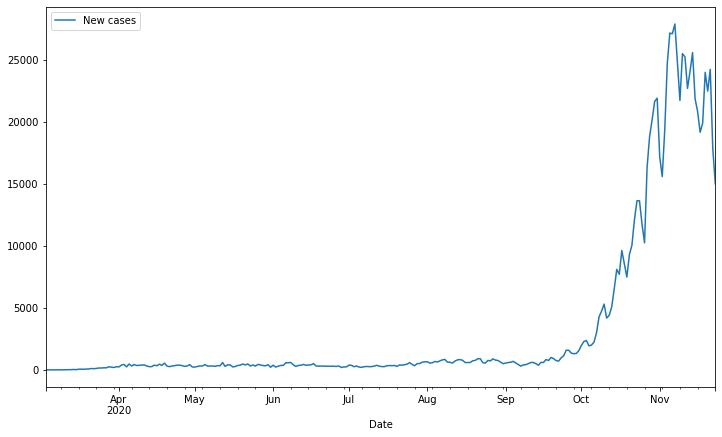

In [161]:
plt.rcParams['figure.figsize'] = [12, 7]
df_infections.plot(x="Date", y="New cases", kind="line")

## Covid data from an open-source project


In [162]:
df_infections = pd.read_csv("infections_jhu.csv")
# extract interesting columns only
columns = ['date', 'Poland']
df_infections = pd.DataFrame(df_infections, columns=columns)

# rename columns
df_infections.columns = ['Date', 'New cases']
# remove unfilled rows
df_infections.dropna(subset = ['New cases'], inplace=True)
# change type of feature
df_infections['New cases'] = df_infections['New cases'].astype(int)
# change to datetime
df_infections['Date'] = pd.to_datetime(df_infections['Date'])

df_infections.reset_index(drop=True)
df_infections

,Date,New cases
42,2020-03-04,1
43,2020-03-05,0
44,2020-03-06,4
45,2020-03-07,0
46,2020-03-08,6
...,...,...
692,2021-12-14,17460
693,2021-12-15,24264
694,2021-12-16,22096
695,2021-12-17,20027


In [163]:
df_infections.info()
# print(df_infections.to_string()) # prints all rows (useful for debugging purposes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 42 to 696
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       655 non-null    datetime64[ns]
 1   New cases  655 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.4 KB


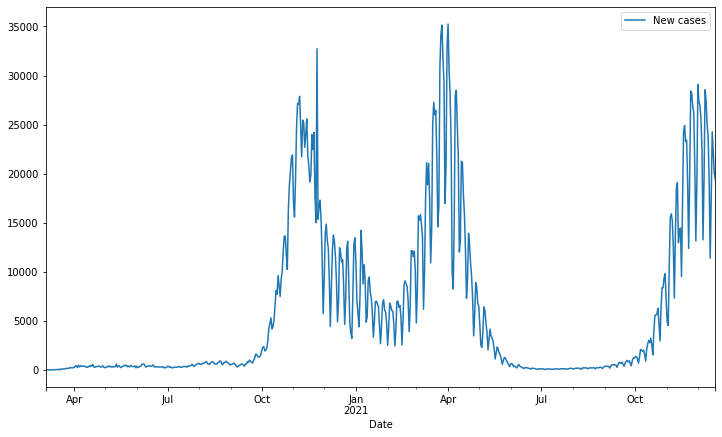

In [164]:
df_infections.plot(x="Date", y="New cases", kind="line")

Wykres nie jest "gładki" co wynika z tego że w poniedziałki liczba raportowanych nowych przypadków jest zwykle dwukrotnie mniejsza niż w inne dni danego tygodnia.

*co wynika z różnego rodzaju opóźnień spowodowanych przez szpitale oraz sanepidy (m.in. opóźnień w testowaniu oraz w raportowaniu)*:

[COVID-19 nie lubi poniedziałków - Jarosław Kopeć](https://biqdata.wyborcza.pl/biqdata/7,159116,26265890,wirus-nie-lubi-poniedzialkow-dwie-zagadki-na-temat-koronawirusa.html)

## Data about weather


In [165]:
df_weather = pd.read_csv("combined_weather.csv", delimiter=',', header=None, encoding="windows-1250")
df_weather.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,349190600,BIELSKO-BIAŁA,2021,9,1,16.4,NaN,11.3,NaN,13.0,NaN,11.4,NaN,3.4,NaN,W,0,9.0,0.0,9.0,1.2,NaN,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0,NaN,0,8.0,R,0,9.0,0,9.0,0,8
1,349190600,BIELSKO-BIAŁA,2021,9,2,18.4,NaN,12.1,NaN,14.1,NaN,10.7,NaN,0.0,9.0,NaN,0,9.0,0.0,9.0,4.3,NaN,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0,NaN,0,8.0,R,0,9.0,0,9.0,0,8
2,349190600,BIELSKO-BIAŁA,2021,9,3,21.2,NaN,8.6,NaN,15.3,NaN,7.5,NaN,0.0,9.0,NaN,0,9.0,0.0,9.0,11.1,NaN,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0,NaN,0,8.0,R,0,9.0,0,9.0,0,8
3,349190600,BIELSKO-BIAŁA,2021,9,4,21.4,NaN,9.2,NaN,15.4,NaN,7.7,NaN,0.0,9.0,NaN,0,9.0,0.0,9.0,10.2,NaN,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0,NaN,0,8.0,R,0,9.0,0,9.0,0,8
4,349190600,BIELSKO-BIAŁA,2021,9,5,18.0,NaN,9.4,NaN,13.1,NaN,7.9,NaN,0.0,9.0,NaN,0,9.0,0.0,9.0,11.3,NaN,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0,NaN,0,8.0,R,0,9.0,0,9.0,0,8


In [166]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19736 entries, 0 to 19735
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       19736 non-null  int64  
 1   1       19736 non-null  object 
 2   2       19736 non-null  int64  
 3   3       19736 non-null  int64  
 4   4       19736 non-null  int64  
 5   5       19736 non-null  float64
 6   6       19 non-null     float64
 7   7       19736 non-null  float64
 8   8       19 non-null     float64
 9   9       19736 non-null  float64
 10  10      5 non-null      float64
 11  11      19736 non-null  float64
 12  12      687 non-null    float64
 13  13      19736 non-null  float64
 14  14      7618 non-null   float64
 15  15      10676 non-null  object 
 16  16      19736 non-null  int64  
 17  17      16725 non-null  float64
 18  18      19736 non-null  float64
 19  19      17727 non-null  float64
 20  20      19736 non-null  float64
 21  21      4850 non-null   float64
 22

In [167]:
columns = ['Station name', 'year', 'month', 'day', 'avg temp']

# rename interesting rows and extract them
df_weather.rename(columns={1:columns[0], 2: columns[1], 3: columns[2], 4:columns[3], 9:columns[4]}, inplace=True)
df_weather = pd.DataFrame(df_weather, columns=columns)

# fix NA values
df_weather.dropna(subset = ['avg temp'], inplace=True)
df_weather.dropna(subset = ['month'], inplace=True)

# fix types (float -> int)
df_weather['year'] = df_weather['year'].astype(int)
df_weather['month'] = df_weather['month'].astype(int)

# convert 3 columns representing date to python datetime object
date = df_weather.apply(lambda x: datetime.date(int(x['year']), x['month'], x['day']),axis=1)
date = pd.to_datetime(date)
df_weather.drop(columns=['year', 'month', 'day'], inplace=True)
df_weather.insert(0, 'Date', date)

df_weather.sort_values(by='Date', inplace=True)
df_weather.reset_index(drop=True)

print(df_weather)

            Date         Station name  avg temp
7076  2020-01-01  WROCŁAW-STRACHOWICE       1.8
7077  2020-01-02  WROCŁAW-STRACHOWICE      -1.9
7078  2020-01-03  WROCŁAW-STRACHOWICE       1.1
7079  2020-01-04  WROCŁAW-STRACHOWICE       4.8
7080  2020-01-05  WROCŁAW-STRACHOWICE       1.0
...          ...                  ...       ...
12843 2021-11-30         JELENIA GÓRA       1.5
12723 2021-11-30     HALA GĄSIENICOWA      -6.9
13923 2021-11-30                TORUŃ       0.7
13983 2021-11-30              OLSZTYN      -0.3
13653 2021-11-30                PŁOCK       1.0

[19736 rows x 3 columns]


In [168]:
# select specific station
df_weather = df_weather[df_weather["Station name"] == "WROCŁAW-STRACHOWICE"]
df_weather.reset_index(drop=True)

print(df_weather.info())
print(df_weather.head())
# print(df_weather.to_string())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 7076 to 13323
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          700 non-null    datetime64[ns]
 1   Station name  700 non-null    object        
 2   avg temp      700 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 21.9+ KB
None
           Date         Station name  avg temp
7076 2020-01-01  WROCŁAW-STRACHOWICE       1.8
7077 2020-01-02  WROCŁAW-STRACHOWICE      -1.9
7078 2020-01-03  WROCŁAW-STRACHOWICE       1.1
7079 2020-01-04  WROCŁAW-STRACHOWICE       4.8
7080 2020-01-05  WROCŁAW-STRACHOWICE       1.0


Plot to check validity

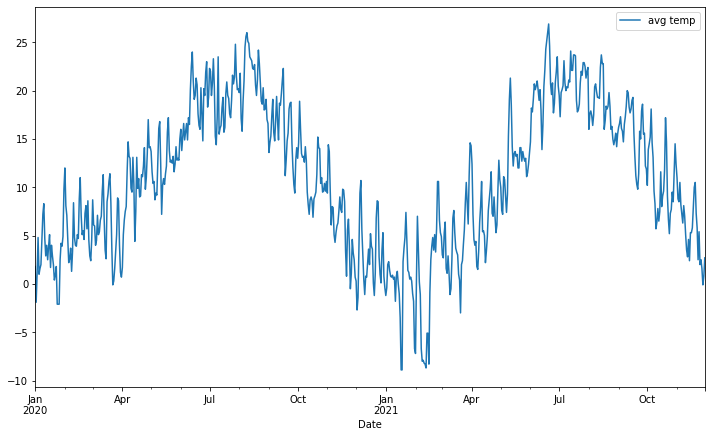

In [169]:
df_weather.plot(x="Date", y="avg temp", kind="line")

## Task from exercise list


In [170]:
df_merged = pd.merge(df_weather, df_infections, how='right', on='Date')
df_merged.dropna(subset = ['avg temp'], inplace=True)
df_merged.dropna(subset = ['Station name'], inplace=True)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 0 to 636
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          637 non-null    datetime64[ns]
 1   Station name  637 non-null    object        
 2   avg temp      637 non-null    float64       
 3   New cases     637 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 24.9+ KB


In [171]:
df_merged

,Date,Station name,avg temp,New cases
0,2020-03-04,WROCŁAW-STRACHOWICE,4.0,1
1,2020-03-05,WROCŁAW-STRACHOWICE,4.5,0
2,2020-03-06,WROCŁAW-STRACHOWICE,7.1,4
3,2020-03-07,WROCŁAW-STRACHOWICE,5.1,0
4,2020-03-08,WROCŁAW-STRACHOWICE,5.4,6
...,...,...,...,...
632,2021-11-26,WROCŁAW-STRACHOWICE,2.5,26794
633,2021-11-27,WROCŁAW-STRACHOWICE,1.6,26188
634,2021-11-28,WROCŁAW-STRACHOWICE,-0.1,20574
635,2021-11-29,WROCŁAW-STRACHOWICE,0.8,13133


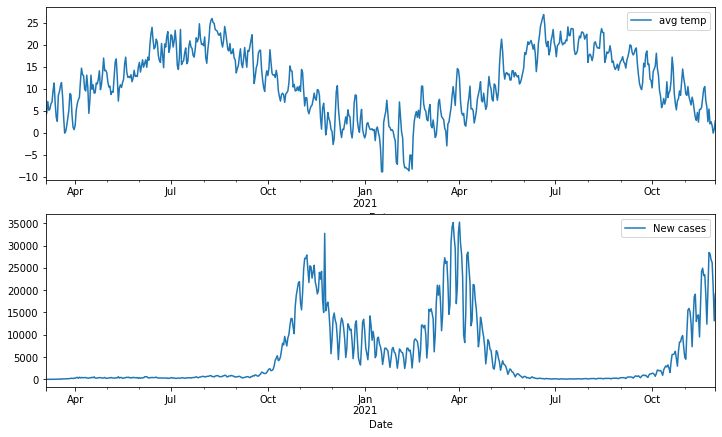

In [172]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
df_merged.plot(x="Date", y="avg temp", kind="line", ax=ax1)
ax2 = fig.add_subplot(212)
df_merged.plot(x="Date", y="New cases", kind="line", ax=ax2)
plt.show()

### a) cold season vs covid wave


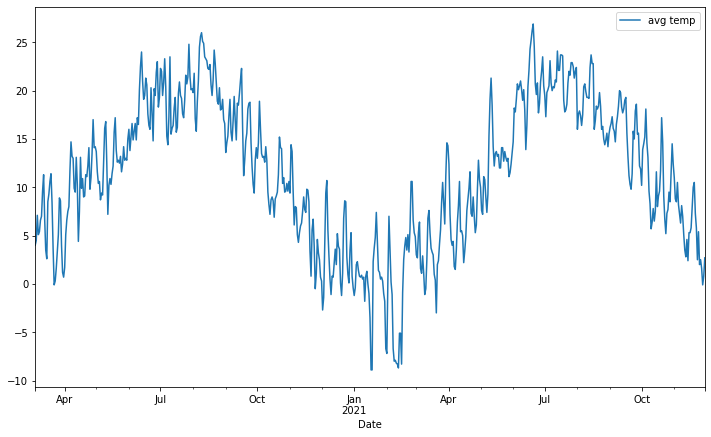

In [173]:
df_merged.plot(x="Date", y="avg temp", kind="line")

In [174]:
start_date = "2020-11-01" 
end_date = "2021-03-01"

mask = (df_merged['Date'] > start_date) & (df_merged['Date'] <= end_date)
df_cold = df_merged.loc[mask]
df_cold.head()

,Date,Station name,avg temp,New cases
243,2020-11-02,WROCŁAW-STRACHOWICE,14.4,15578
244,2020-11-03,WROCŁAW-STRACHOWICE,13.7,19364
245,2020-11-04,WROCŁAW-STRACHOWICE,9.6,24692
246,2020-11-05,WROCŁAW-STRACHOWICE,6.1,27143
247,2020-11-06,WROCŁAW-STRACHOWICE,8.0,27086


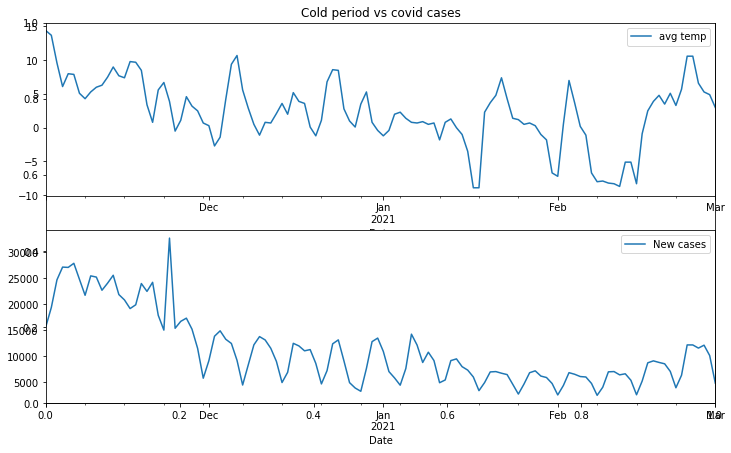

In [175]:
fig = plt.figure()
plt.title("Cold period vs covid cases")
ax1 = fig.add_subplot(211)
df_cold.plot(x="Date", y="avg temp", kind="line", ax=ax1)
ax2 = fig.add_subplot(212)
df_cold.plot(x="Date", y="New cases", kind="line", ax=ax2)
plt.show()

### b) hot season vs covid wave

In [176]:
start_date = "2021-06-01" 
end_date = "2021-09-10"

mask = (df_merged['Date'] > start_date) & (df_merged['Date'] <= end_date)
df_hot = df_merged.loc[mask]
df_hot.head()

,Date,Station name,avg temp,New cases
455,2021-06-02,WROCŁAW-STRACHOWICE,18.2,659
456,2021-06-03,WROCŁAW-STRACHOWICE,17.8,565
457,2021-06-04,WROCŁAW-STRACHOWICE,19.1,319
458,2021-06-05,WROCŁAW-STRACHOWICE,20.7,413
459,2021-06-06,WROCŁAW-STRACHOWICE,20.1,312


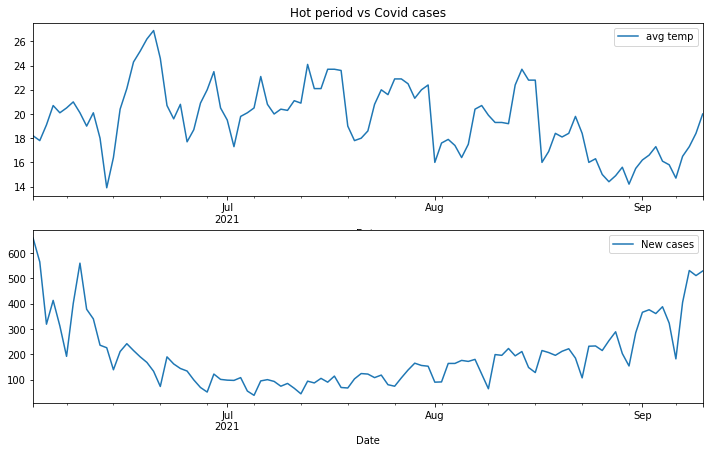

In [177]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
plt.title("Hot period vs Covid cases")
df_hot.plot(x="Date", y="avg temp", kind="line", ax=ax1)
ax2 = fig.add_subplot(212)
df_hot.plot(x="Date", y="New cases", kind="line", ax=ax2)
plt.show()

### Summary & Notes
Widać, że wysokie temperatury sprzyjają malejącej liczbe nowych dziennych zakażeń, a niskie wyższej.

ALE, widać również, że ilość zakażeń nie jest ściśle skorelowana z temperaturą (np. obserwujemy spadek zakażeń w styczniu i lutym 2021, mimo, że są one najzimniejszymi miesiącami w badanym przedziale czasu.

Możnaby uśrednić temperaturę z paru stacji i wyciągnąć średnią tygodniową by wygładzić wachania pogody.

Podobnie dla zakażeń wyciągnąć średnią tygodniową, by zniwelować błędy w raportowaniu.

Wtedy możnaby policzyć precyzyjnie korelację (ale jest to czasochłonne, a już teraz widać, że znaczenie mają również inne czynniki tj. np. okoliczne święta, obostrzenia, szczepienia itp, które przy różnych falach były różne i zaburzałyby wyniki).